In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: AL
Digite os 2 primeiros digitos do shapefile: 27


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 14 columns):
ID            3759 non-null int64
CD_GEOCODI    3759 non-null object
TIPO          3759 non-null object
CD_GEOCODB    1352 non-null object
NM_BAIRRO     1352 non-null object
CD_GEOCODS    3759 non-null object
NM_SUBDIST    1058 non-null object
CD_GEOCODD    3759 non-null object
NM_DISTRIT    3759 non-null object
CD_GEOCODM    3759 non-null object
NM_MUNICIP    3759 non-null object
NM_MICRO      3759 non-null object
NM_MESO       3759 non-null object
geometry      3759 non-null object
dtypes: int64(1), object(13)
memory usage: 411.2+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(3724, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,270010205000001,315.0,1188.0,"3,77","3,71","633,74","1027296,86","715,51","1101608,13","348,69","483897,06","610,98","687991,4"
1,270010205000002,222.0,886.0,"3,99","3,67","773,12","2557431,08","853,9","2756644,01","402,86","1034747,3",700,"1591282,25"
2,270010205000003,276.0,1083.0,"3,92","2,8","514,72","239644,04","591,93","229848,07","293,06","177168,93","519,13","196520,18"
3,270010205000004,77.0,265.0,"3,44","2,59","503,38","216690,66","625,16","192592,07","303,83",168778,"576,76","162925,33"
4,270010205000005,270.0,1244.0,"4,61","6,34","304,49","62000,85","362,17","52815,26","178,1","56646,59","363,82","48128,51"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3724 entries, 0 to 3723
Data columns (total 26 columns):
ID            3724 non-null int64
CD_GEOCODI    3724 non-null int64
TIPO          3724 non-null object
CD_GEOCODB    1350 non-null object
NM_BAIRRO     1350 non-null object
CD_GEOCODS    3724 non-null object
NM_SUBDIST    1057 non-null object
CD_GEOCODD    3724 non-null object
NM_DISTRIT    3724 non-null object
CD_GEOCODM    3724 non-null object
NM_MUNICIP    3724 non-null object
NM_MICRO      3724 non-null object
NM_MESO       3724 non-null object
geometry      3724 non-null object
V001          3714 non-null float64
V002          3714 non-null float64
V003          3714 non-null object
V004          3714 non-null object
V005          3714 non-null object
V006          3714 non-null object
V007          3710 non-null object
V008          3710 non-null object
V009          3724 non-null object
V010          3724 non-null object
V011          3718 non-null object
V012      

In [11]:
del gdf
del dados

Text(0.5,1,'AL')

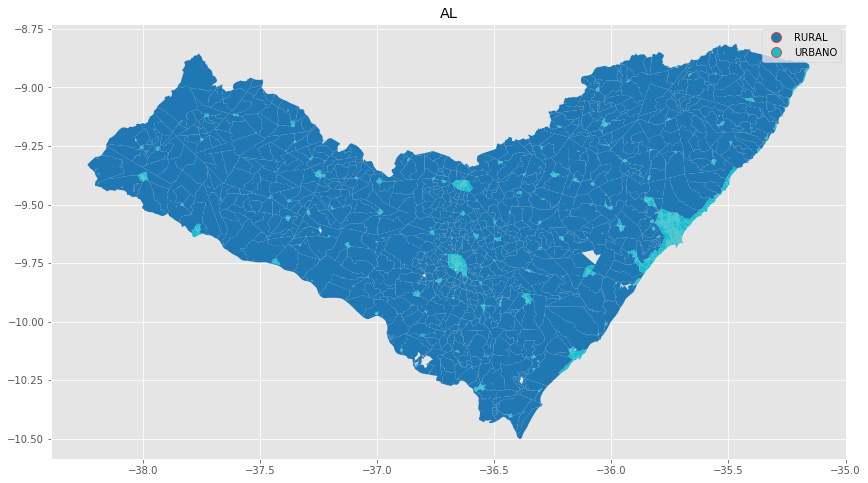

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
5284,Anadia,AL,1.505,2700201.0,POLYGON ((-36.30125810352796 -9.69538832312155...,1.505509
5427,Ãgua Branca,AL,1.227,2700102.0,(POLYGON ((-37.93904783414554 -9.2699754496839...,1.226907
5434,Arapiraca,AL,59.000,2700300.0,(POLYGON ((-36.55486933514043 -9.8395755151844...,59.000989
5435,Atalaia,AL,6.160,2700409.0,(POLYGON ((-36.06665460524715 -9.5290391903923...,6.160446
5436,Barra de Santo AntÃ´nio,AL,4.326,2700508.0,(POLYGON ((-35.51325162589037 -9.4397110827610...,4.325633


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 102 entries, 5284 to 5534
Data columns (total 6 columns):
Municipio     102 non-null object
UF            102 non-null object
Area_Urb      102 non-null float64
CD_GEOCODM    102 non-null int64
geometry      102 non-null object
Area          102 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.6+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no AL')

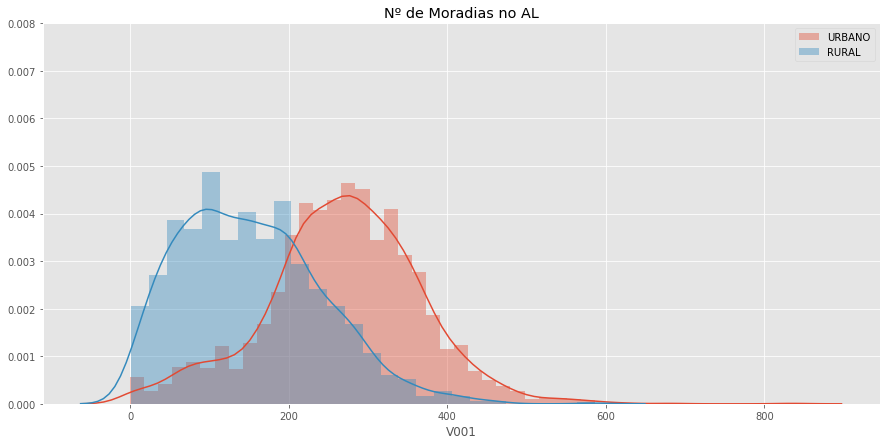

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1343.000000
mean      152.473567
std        89.199791
min         1.000000
25%        83.000000
50%       143.000000
75%       207.500000
max       586.000000
Name: V001, dtype: float64
URBANO 
 count    2381.000000
mean      268.001680
std        98.220435
min         0.000000
25%       212.000000
50%       271.000000
75%       331.000000
max       835.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

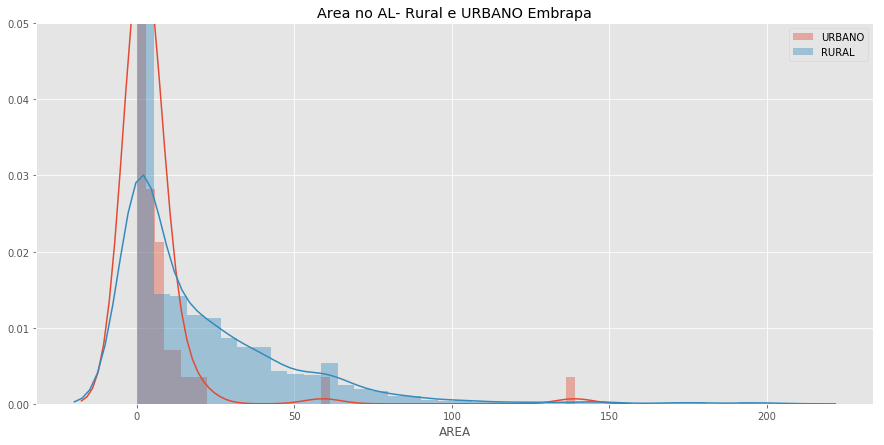

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

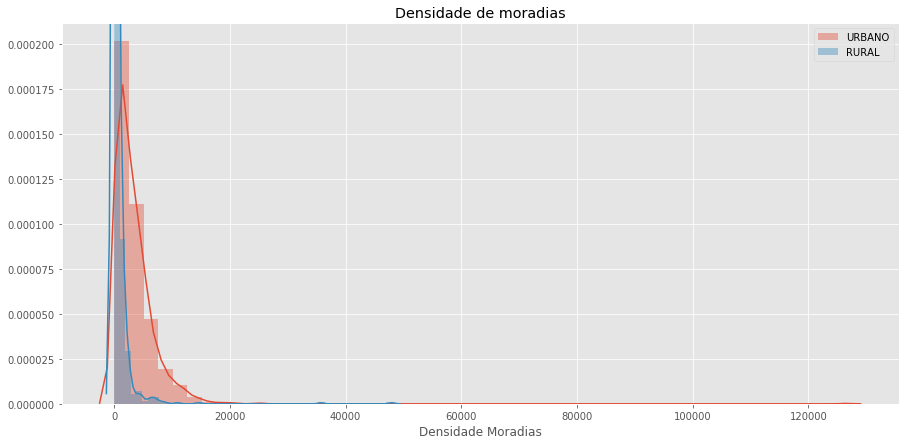

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     1343.000000
mean       516.033433
std       1922.157080
min          0.053756
25%          4.716315
50%         16.993616
75%        573.634880
max      48007.158079
Name: Densidade Moradias, dtype: float64
URBANO 
 count      2381.000000
mean       3332.607455
std        3993.365406
min           0.000000
25%         980.914310
50%        2456.906401
75%        4600.117772
max      126468.991392
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000
mean,1717.570513,2.704431e+14,163.211538,673.570513,0.084349,3036.340110
std,1264.749819,3.041595e+11,92.589765,412.403656,0.064113,4907.266346
min,69.000000,2.700201e+14,19.000000,89.000000,0.005788,1134.483650
25%,521.750000,2.701407e+14,84.000000,350.250000,0.036114,1420.718980
50%,1190.000000,2.704203e+14,149.000000,589.500000,0.061515,1828.932069
75%,3097.250000,2.707503e+14,231.500000,947.500000,0.123705,2604.163200
max,3727.000000,2.709301e+14,395.000000,1999.000000,0.301560,48007.158079


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    102.000000
mean       4.616131
std       15.007910
min        0.191512
25%        0.775533
50%        1.336476
75%        2.706945
max      138.939676
Name: Area, dtype: float64
RURAL 
 count    1343.000000
mean       20.035065
std        27.937387
min         0.004095
25%         0.207188
50%         9.388237
75%        30.080843
max       201.881188
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

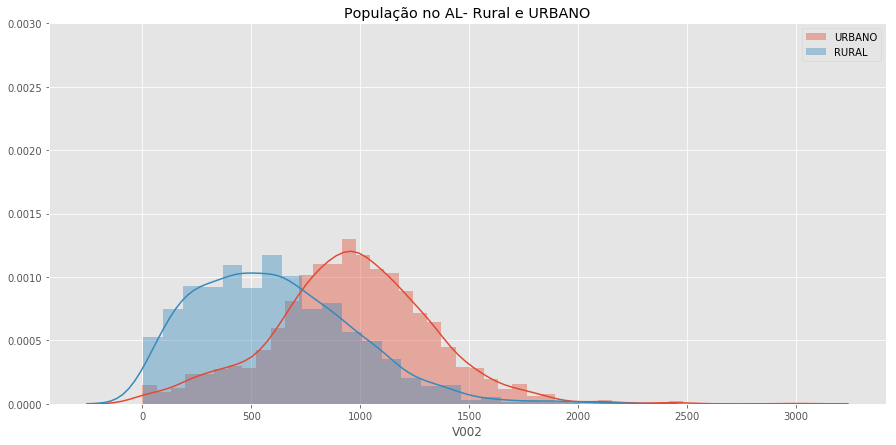

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1343.000000
mean      607.827252
std       362.521392
min         3.000000
25%       325.000000
50%       575.000000
75%       842.000000
max      2194.000000
Name: V002, dtype: float64
URBANO 
 count    2381.000000
mean      958.815204
std       367.833393
min         0.000000
25%       738.000000
50%       961.000000
75%      1183.000000
max      3007.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,1355.900000,2.703425e+14,304.400000,1407.100000,0.060687,9729.368523
std,1310.521478,3.198396e+11,36.268137,341.180125,0.035793,13608.606573
min,325.000000,2.700409e+14,270.000000,1021.000000,0.005791,2570.013640
25%,517.250000,2.701407e+14,278.250000,1142.000000,0.043781,3744.599215
50%,522.000000,2.701407e+14,292.000000,1369.500000,0.052305,6264.686775
75%,2605.250000,2.706501e+14,320.750000,1518.250000,0.082012,6959.730435
max,3387.000000,2.708501e+14,379.000000,1999.000000,0.127237,48007.158079


Text(0.5,1,'SCRCU - Por Município')

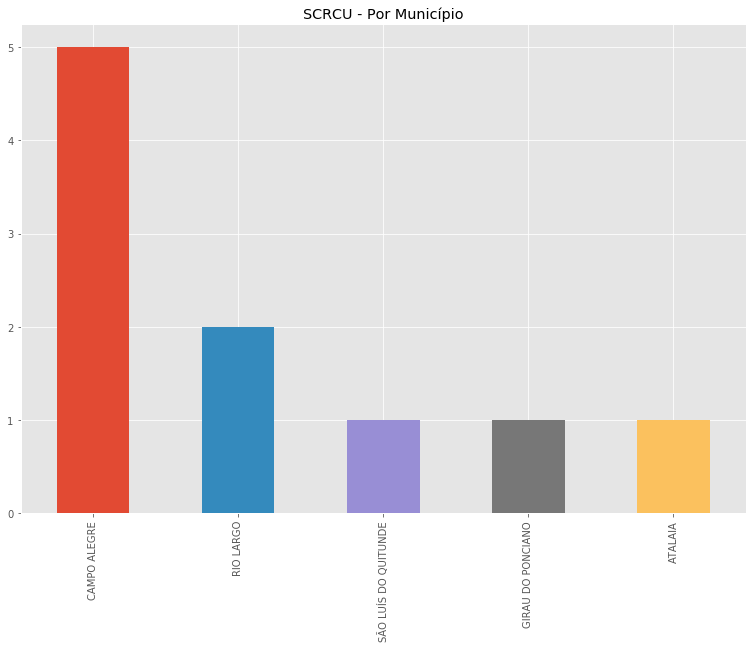

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


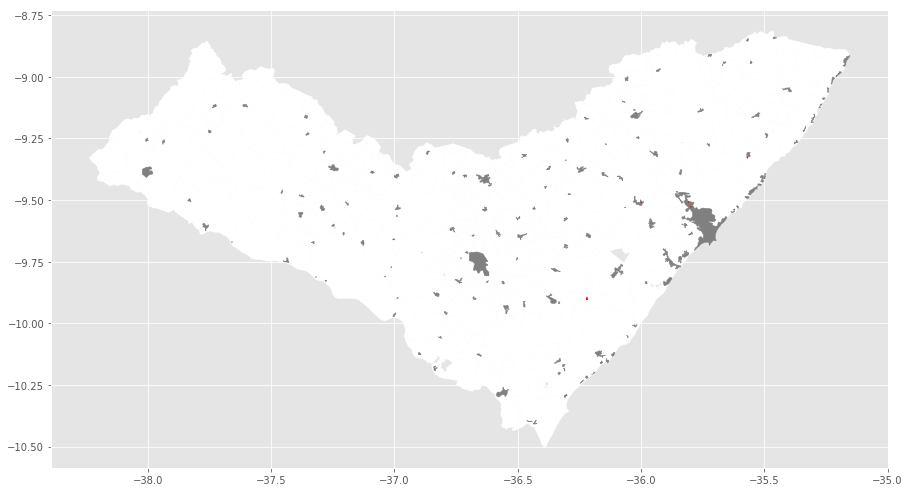

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

,geometry,FONTE
299,"POLYGON ((-36.002039501897 -9.50934520103459, ...",1.0
498,POLYGON ((-36.22255987312879 -9.90414646838548...,1.0
501,"POLYGON ((-36.2217078861006 -9.89895862871284,...",1.0
502,"POLYGON ((-36.2226006031376 -9.89890019962834,...",1.0
505,POLYGON ((-36.2184521307709 -9.892648824121709...,1.0


In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [43]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)